In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import classification_report
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [37]:
df = pd.read_csv('final_df.csv', index_col = 0)
pd.set_option('display.max_columns', None)

In [38]:
df

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,7.0,11.27,4.0,1,809.98,26.822620,265.0,1,49.574949,80.415295,2,312.494089,0
1,3392,3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,7.0,11.27,4.0,1,809.98,28.609352,267.0,1,49.574949,81.699521,4,331.209863,0
2,3392,4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,5.0,4.0,6.27,4.0,1,809.98,31.377862,268.0,1,49.574949,199.458074,5,223.451310,0
3,3392,5,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,6.0,4.0,11.27,4.0,1,809.98,24.797347,269.0,1,49.574949,41.420153,1,341.489231,0
4,3392,6,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,8.0,4.0,9.27,4.0,1,809.98,27.262259,270.0,1,49.574949,62.430172,1,340.479212,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79614,37932,4,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,683,23.0,7.0,11.50,3.0,1,502.38,34.663572,378.0,1,35.104023,60.971333,0,479.866228,1
79615,37932,5,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,683,18.0,7.0,11.50,3.0,1,502.38,40.565631,379.0,1,35.104023,54.185950,1,496.651610,1
79616,37932,6,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,683,27.0,6.0,11.50,3.0,1,502.38,41.255522,380.0,1,35.104023,24.028477,0,516.809083,1
79617,37932,7,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,683,20.0,6.0,11.50,3.0,1,502.38,33.638208,381.0,1,35.104023,251.672582,3,319.164979,2


In [39]:
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [41]:
xgb = XGBClassifier(random_state = 0)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

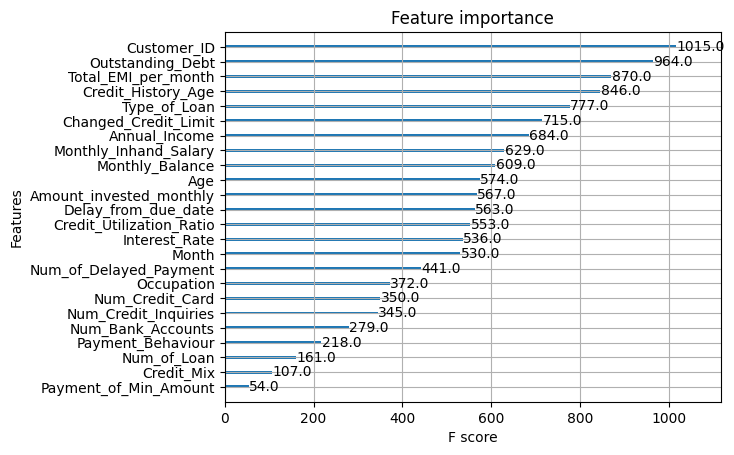

In [42]:
plot_importance(xgb)

In [43]:

# Make predictions on the test data
y_pred = xgb.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7814619442351168


In [44]:
report = classification_report(y_test, y_pred)
print(report )

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      3853
           1       0.78      0.78      0.78      7409
           2       0.80      0.80      0.80     12624

    accuracy                           0.78     23886
   macro avg       0.77      0.77      0.77     23886
weighted avg       0.78      0.78      0.78     23886



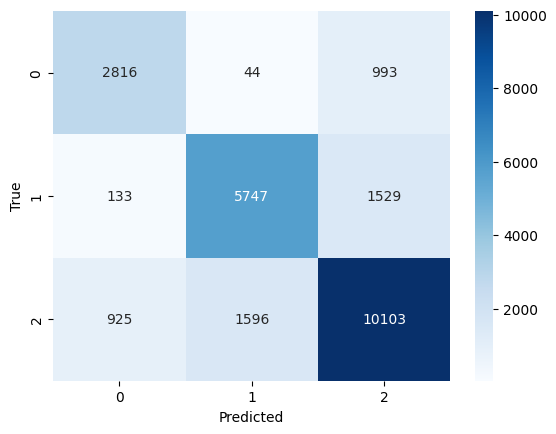

In [45]:
# Assuming y_true contains the true labels and y_pred contains the predicted labels
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [46]:
# So lets try to improve the accuracy by trying to balance the datasets 

In [47]:
df_copy = df.copy() 

In [48]:
df_copy

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,7.0,11.27,4.0,1,809.98,26.822620,265.0,1,49.574949,80.415295,2,312.494089,0
1,3392,3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,7.0,11.27,4.0,1,809.98,28.609352,267.0,1,49.574949,81.699521,4,331.209863,0
2,3392,4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,5.0,4.0,6.27,4.0,1,809.98,31.377862,268.0,1,49.574949,199.458074,5,223.451310,0
3,3392,5,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,6.0,4.0,11.27,4.0,1,809.98,24.797347,269.0,1,49.574949,41.420153,1,341.489231,0
4,3392,6,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,8.0,4.0,9.27,4.0,1,809.98,27.262259,270.0,1,49.574949,62.430172,1,340.479212,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79614,37932,4,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,683,23.0,7.0,11.50,3.0,1,502.38,34.663572,378.0,1,35.104023,60.971333,0,479.866228,1
79615,37932,5,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,683,18.0,7.0,11.50,3.0,1,502.38,40.565631,379.0,1,35.104023,54.185950,1,496.651610,1
79616,37932,6,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,683,27.0,6.0,11.50,3.0,1,502.38,41.255522,380.0,1,35.104023,24.028477,0,516.809083,1
79617,37932,7,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,683,20.0,6.0,11.50,3.0,1,502.38,33.638208,381.0,1,35.104023,251.672582,3,319.164979,2


In [49]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df_copy[(df_copy['Credit_Score']==2)] 
df_minority = df_copy[(df_copy['Credit_Score']==1)] 
df_minority2 = df_copy[(df_copy['Credit_Score']==0)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 41808, # to match majority class
                                 random_state=0)  # reproducible results
df_minority_upsampled2 = resample(df_minority2, 
                                 replace=True,    # sample with replacement
                                 n_samples= 41808, # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_minority_upsampled2, df_majority])

In [50]:
df_upsampled = df_upsampled.drop(df.columns[0], axis=1)

Credit_Score
1    41808
0    41808
2    41808
Name: count, dtype: int64

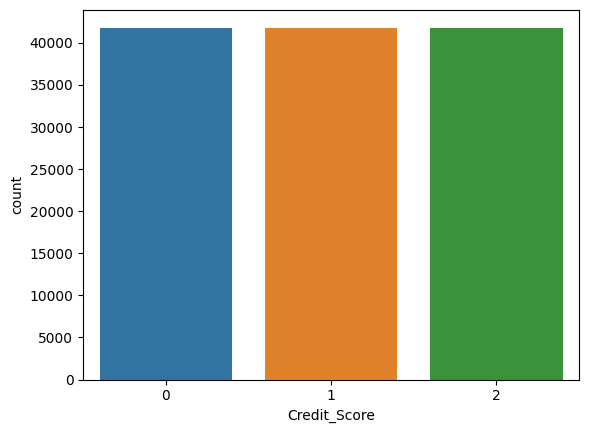

In [51]:
#Counting 1 and 0 Value in Response column
sns.countplot(x = 'Credit_Score', data = df_upsampled)
df_upsampled['Credit_Score'].value_counts()

In [52]:
df2= df_upsampled.copy()

In [53]:
X = df2.drop('Credit_Score', axis=1)
y = df2['Credit_Score']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [55]:
xgb = XGBClassifier(random_state = 0)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [56]:

# Make predictions on the test data
y_pred = xgb.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.838497927075582


In [57]:
report = classification_report(y_test, y_pred)
print(report )

              precision    recall  f1-score   support

           0       0.84      0.94      0.88     12655
           1       0.84      0.88      0.86     12454
           2       0.84      0.69      0.76     12519

    accuracy                           0.84     37628
   macro avg       0.84      0.84      0.83     37628
weighted avg       0.84      0.84      0.84     37628



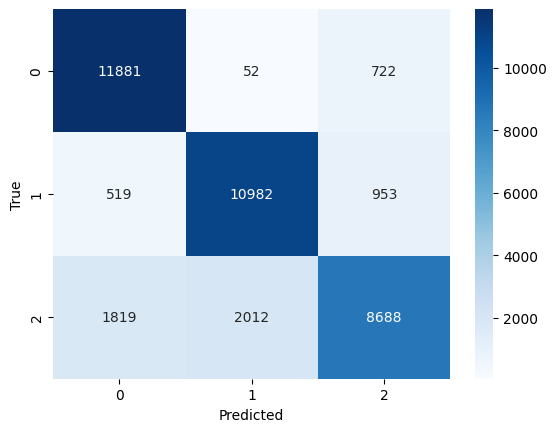

In [58]:

# Assuming y_true contains the true labels and y_pred contains the predicted labels
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()